In [ ]:
#@title **Deep Learning Project**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# To load dataser
df=pd.read_csv("/content/drive/MyDrive/DL case/heart.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

In [ ]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#@title Data Visualization

<Axes: >

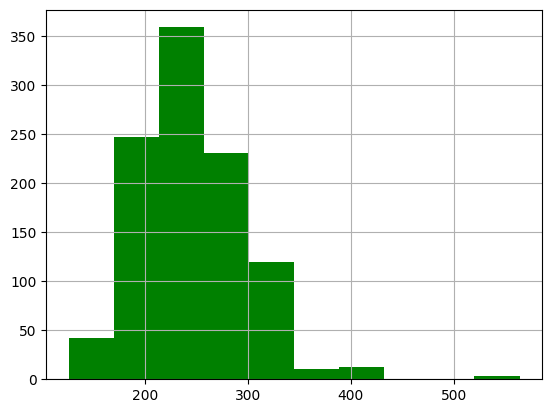

In [ ]:
df['chol'].hist(color="green")

<Axes: xlabel='target', ylabel='count'>

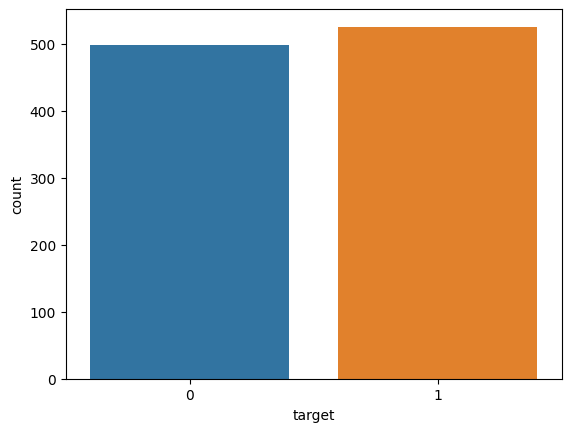

In [ ]:
sns.countplot(df,x="target")

In [ ]:
cate_val=[]
cont_val=[]

# creating 2 new object to store
# categorical column(cate_val)
# and other to store numerical column(cont_val)

for column in df.columns:
    if df[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

sex
1    713
0    312
Name: sex, dtype: int64


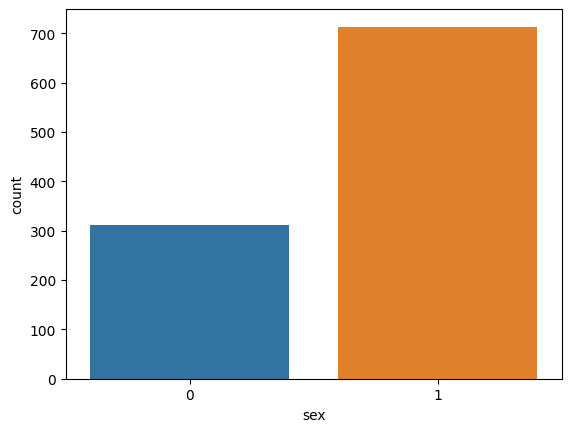

cp
0    497
2    284
1    167
3     77
Name: cp, dtype: int64


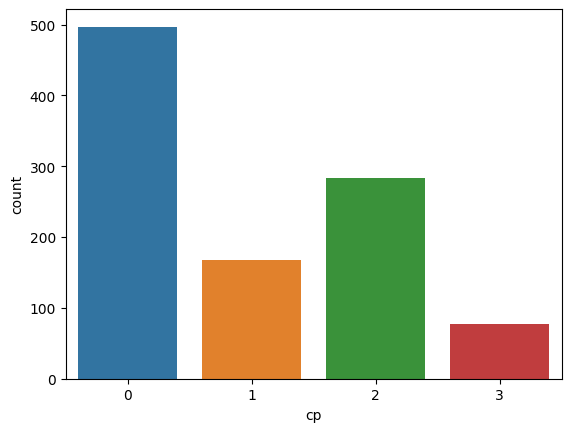

fbs
0    872
1    153
Name: fbs, dtype: int64


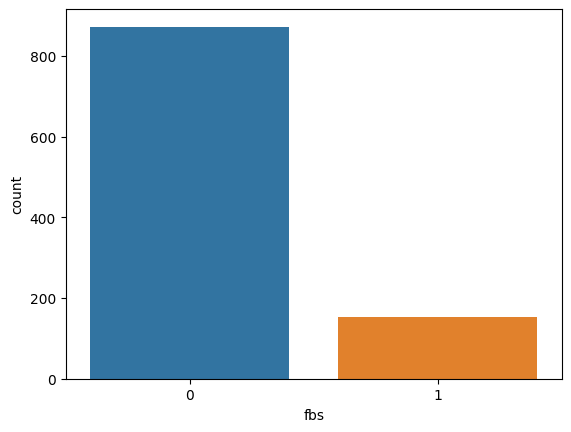

restecg
1    513
0    497
2     15
Name: restecg, dtype: int64


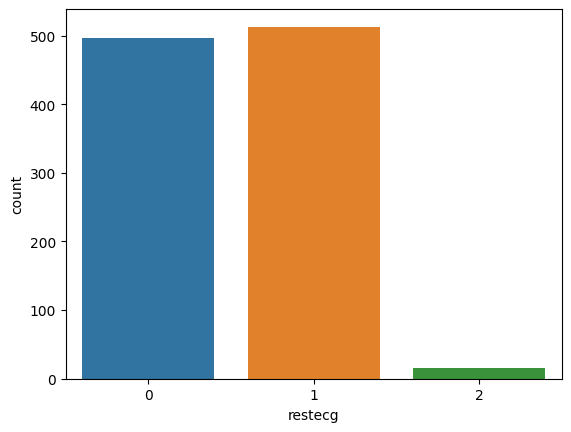

exang
0    680
1    345
Name: exang, dtype: int64


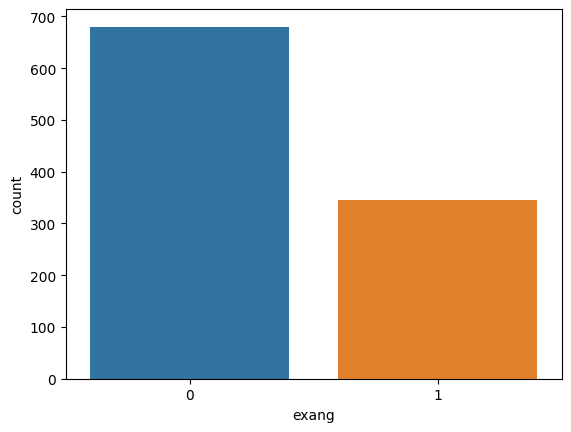

slope
1    482
2    469
0     74
Name: slope, dtype: int64


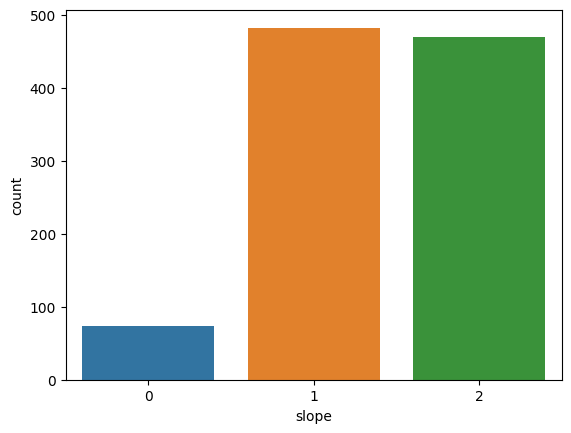

ca
0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64


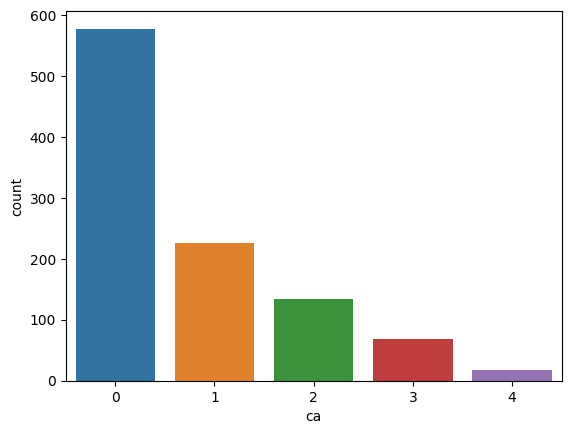

thal
2    544
3    410
1     64
0      7
Name: thal, dtype: int64


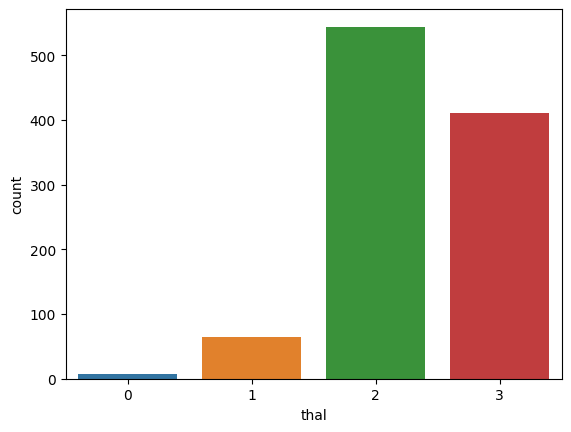

target
1    526
0    499
Name: target, dtype: int64


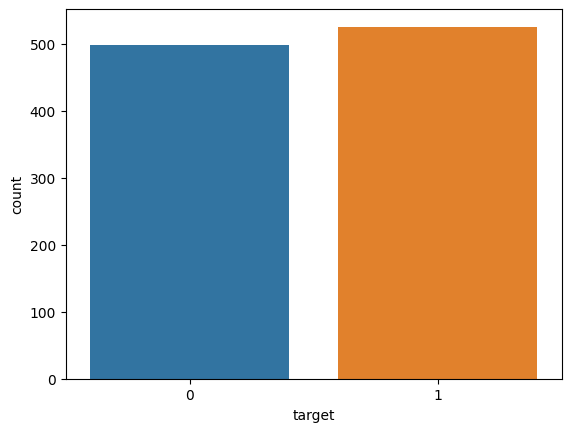

In [ ]:
for col in df[cate_val]:
    print(col)
    print(df[col].value_counts())
    
    sns.countplot(df,x=col)
    plt.show()

In [ ]:
x=df.drop("target",axis=1)
y=df["target"]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(717, 13)
(308, 13)
(717,)
(308,)


In [ ]:
y.value_counts()

1    526
0    499
Name: target, dtype: int64

In [ ]:
xtrain.ndim,type(xtrain)

(2, pandas.core.frame.DataFrame)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.transform(xtest)

In [ ]:
xtrain.ndim,type(xtrain)

(2, numpy.ndarray)

In [ ]:
x.shape

(1025, 13)

In [ ]:
#create a neural network
#first create a object of Sequential class and pass the no. of layers in list inside the class
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=13,activation='relu', input_shape=(x.shape[1],)), #first hidden layer
    tf.keras.layers.Dense(units=1,activation='sigmoid')  #output layer
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 1)                 14        
                                                                 
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile the model
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=["accuracy"])

In [ ]:
# Create EarlyStopping
from keras.callbacks import EarlyStopping
# create object of earlystopping class
es=EarlyStopping(monitor="val_loss",         #val_loss means testing loss
                 min_delta=0.00001,          #value of lambda
                 patience=20,
                 verbose=1,
                 mode="auto",
                 baseline=None,
                 restore_best_weights=False
)

In [ ]:
#Train the model and also check either model is overfit/not overfit
trained_model=model.fit(xtrain,ytrain,epochs=5000,callbacks=es,
                        validation_data=(xtest,ytest))
#trained_model is user defined object

Streaming output truncated to the last 5000 lines.
23/23 [==============================] - 0s 7ms/step - loss: 0.1499 - accuracy: 0.9540 - val_loss: 0.1818 - val_accuracy: 0.9286
Epoch 728/5000
23/23 [==============================] - 0s 5ms/step - loss: 0.1497 - accuracy: 0.9540 - val_loss: 0.1811 - val_accuracy: 0.9286
Epoch 729/5000
23/23 [==============================] - 0s 6ms/step - loss: 0.1496 - accuracy: 0.9512 - val_loss: 0.1808 - val_accuracy: 0.9286
Epoch 730/5000
23/23 [==============================] - 0s 7ms/step - loss: 0.1494 - accuracy: 0.9498 - val_loss: 0.1808 - val_accuracy: 0.9286
Epoch 731/5000
23/23 [==============================] - 0s 8ms/step - loss: 0.1496 - accuracy: 0.9512 - val_loss: 0.1809 - val_accuracy: 0.9286
Epoch 732/5000
23/23 [==============================] - 0s 6ms/step - loss: 0.1493 - accuracy: 0.9512 - val_loss: 0.1801 - val_accuracy: 0.9318
Epoch 733/5000
23/23 [==============================] - 0s 7ms/step - loss: 0.1490 - accuracy: 0.952

In [ ]:
#Evaluating of training data
model.evaluate(xtrain,ytrain)

23/23 [==============================] - 0s 3ms/step - loss: 0.0211 - accuracy: 1.0000


[0.02105521224439144, 1.0]

In [ ]:
#evaluation of testing data
model.evaluate(xtest,ytest)

10/10 [==============================] - 0s 3ms/step - loss: 0.0451 - accuracy: 0.9870


[0.04506854712963104, 0.9870129823684692]

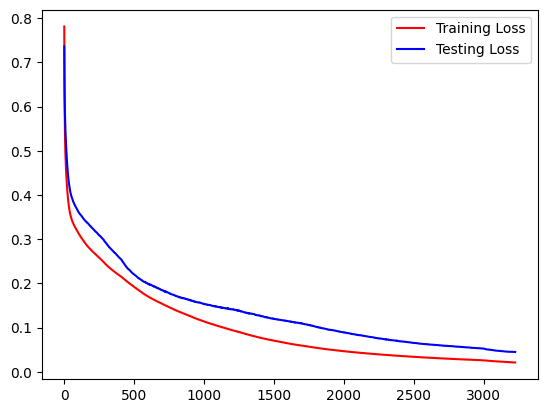

In [ ]:
#Visualization training loss and testing loss(val_loss)
plt.plot(trained_model.history["loss"],color="red",label="Training Loss")
plt.plot(trained_model.history["val_loss"],color="blue",label="Testing Loss")
plt.legend()
plt.show()

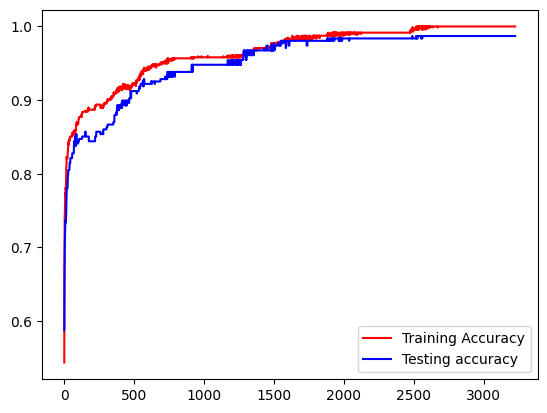

In [ ]:
plt.plot(trained_model.history["accuracy"],color="red",label="Training Accuracy")
plt.plot(trained_model.history["val_accuracy"],color="blue",label="Testing accuracy")
plt.legend()
plt.show()

In [ ]:
# To predict or testing the model with 30% data
ypred=model.predict(xtest).round(2)
#formula: yred=1/(1+np.exp(-xtest))
#its return probability's value

10/10 [==============================] - 0s 2ms/step


In [ ]:
ypred

array([[0.  ],
       [1.  ],
       [0.99],
       [0.8 ],
       [0.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.04],
       [1.  ],
       [0.04],
       [0.01],
       [1.  ],
       [0.02],
       [0.  ],
       [1.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [1.  ],
       [1.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.04],
       [1.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [1.  ],
       [1.  ],
       [0.79],
       [0.  ],
       [0.1 ],
       [0.  ],
       [0.92],
       [0.84],
       [0.  ],
       [0.  ],
       [1.  ],
       [1.  ],
       [0.  ],
       [0.97],
       [0.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.9 ],
       [1.  ],
       [1.  ],
       [0.91],
       [0.89],
       [0.97],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.01],
       [0.02],
       [1.  ],
       [0.01],
       [0.

In [ ]:
dict={"Actual output":ytest}
#converts dict into DataFrame
df1=pd.DataFrame(dict)
df1.head(10)
# To add new column for ypred
df1["Predicted_output"]=ypred
df1.head(10)

,Actual output,Predicted_output
49,0,0.00
525,1,1.00
119,1,0.99
629,0,0.80
186,0,0.00
691,1,1.00
473,1,1.00
422,1,1.00
27,0,0.04
815,1,1.00


In [ ]:
xtest

array([[ 0.61962048,  0.66969011, -0.92148277, ...,  0.98203033,
         1.2292984 ,  1.10232353],
       [-0.38500539, -1.49322796,  1.08368611, ...,  0.98203033,
        -0.72071698, -0.52060454],
       [-1.38963126,  0.66969011,  0.08110167, ...,  0.98203033,
        -0.72071698, -0.52060454],
       ...,
       [ 1.06612087, -1.49322796,  1.08368611, ...,  0.98203033,
        -0.72071698,  1.10232353],
       [-1.38963126,  0.66969011, -0.92148277, ...,  0.98203033,
        -0.72071698, -0.52060454],
       [-0.38500539,  0.66969011,  1.08368611, ...,  0.98203033,
         0.25429071,  1.10232353]])

In [ ]:
ytest.ndim

1

In [ ]:
ypred.ndim

2

In [ ]:
ypred=np.where(ypred>=0.5,1,0)
ypred

array([[0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
    

In [ ]:
dict={"Actual output":ytest}
#converts dict into DataFrame
df1=pd.DataFrame(dict)
df1.head(10)
# To add new column for ypred
df1["Predicted_output"]=ypred
df1.head(20)

,Actual output,Predicted_output
49,0,0
525,1,1
119,1,1
629,0,1
186,0,0
691,1,1
473,1,1
422,1,1
27,0,0
815,1,1


In [ ]:
#generate classification report
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       161
           1       0.97      1.00      0.99       147

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,ypred))

[[157   4]
 [  0 147]]


In [ ]:
model1=tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=13,activation="relu",input_shape=(x.shape[1],)),
    tf.keras.layers.Dense(units=12,activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

In [ ]:
model1.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
trained_model1=model1.fit(xtrain,ytrain, callbacks=es, epochs=5000, validation_data=(xtest,ytest))

Epoch 1/5000
23/23 [==============================] - 1s 15ms/step - loss: 0.6155 - accuracy: 0.7029 - val_loss: 0.6257 - val_accuracy: 0.6786
Epoch 2/5000
23/23 [==============================] - 0s 5ms/step - loss: 0.5931 - accuracy: 0.7350 - val_loss: 0.6063 - val_accuracy: 0.6916
Epoch 3/5000
23/23 [==============================] - 0s 7ms/step - loss: 0.5734 - accuracy: 0.7392 - val_loss: 0.5884 - val_accuracy: 0.7143
Epoch 4/5000
23/23 [==============================] - 0s 5ms/step - loss: 0.5549 - accuracy: 0.7601 - val_loss: 0.5709 - val_accuracy: 0.7468
Epoch 5/5000
23/23 [==============================] - 0s 8ms/step - loss: 0.5374 - accuracy: 0.7657 - val_loss: 0.5545 - val_accuracy: 0.7630
Epoch 6/5000
23/23 [==============================] - 0s 8ms/step - loss: 0.5206 - accuracy: 0.7838 - val_loss: 0.5388 - val_accuracy: 0.7662
Epoch 7/5000
23/23 [==============================] - 0s 6ms/step - loss: 0.5047 - accuracy: 0.7950 - val_loss: 0.5249 - val_accuracy: 0.7695
Epoch

In [ ]:
model1.evaluate(xtrain,ytrain)

23/23 [==============================] - 0s 2ms/step - loss: 0.0391 - accuracy: 0.9958


[0.03911313787102699, 0.9958158731460571]

In [ ]:
model1.evaluate(xtest,ytest)

10/10 [==============================] - 0s 2ms/step - loss: 0.1414 - accuracy: 0.9740


[0.14138288795948029, 0.9740259647369385]

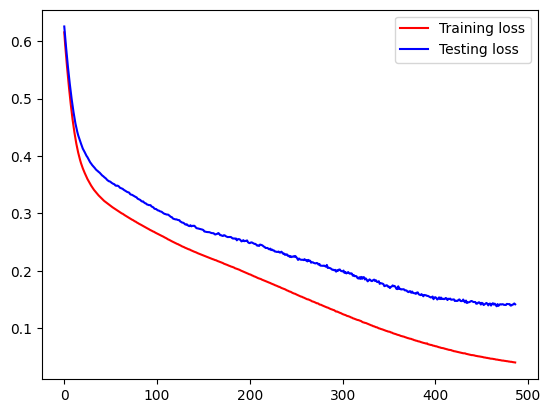

In [ ]:
plt.plot(trained_model1.history["loss"],color="red",label="Training loss")
plt.plot(trained_model1.history["val_loss"],color="blue",label="Testing loss")
plt.legend()
plt.show()

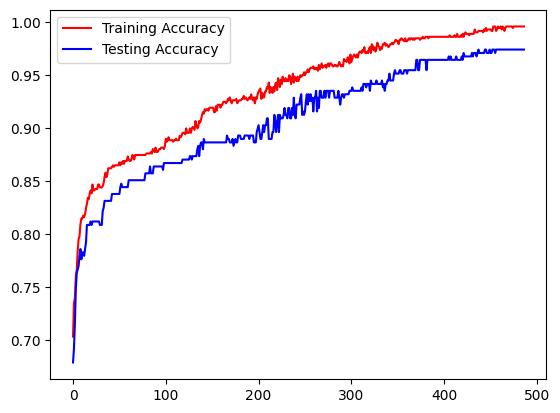

In [ ]:
plt.plot(trained_model1.history["accuracy"],color="red",label="Training Accuracy")
plt.plot(trained_model1.history["val_accuracy"],color="blue",label="Testing Accuracy")
plt.legend()
plt.show()

In [ ]:
ypred=model1.predict(xtest)
ypred

10/10 [==============================] - 0s 3ms/step


array([[1.31563209e-02],
       [9.99951541e-01],
       [8.50742519e-01],
       [9.99009907e-01],
       [2.06263065e-02],
       [9.71011877e-01],
       [9.71029878e-01],
       [9.99986768e-01],
       [5.91570437e-02],
       [9.95275855e-01],
       [2.92953253e-01],
       [3.06777749e-02],
       [9.96930957e-01],
       [1.17058645e-03],
       [1.18347198e-01],
       [9.99194682e-01],
       [2.60101615e-07],
       [9.99740899e-01],
       [2.54874550e-07],
       [9.95275855e-01],
       [9.95657563e-01],
       [1.31563209e-02],
       [9.99808428e-04],
       [1.47824902e-02],
       [2.92953253e-01],
       [9.98096049e-01],
       [1.53275870e-03],
       [9.98835802e-01],
       [2.98537500e-02],
       [9.46466565e-01],
       [9.97826219e-01],
       [8.04667354e-01],
       [1.52465228e-11],
       [2.86234289e-01],
       [1.39861569e-01],
       [9.08282816e-01],
       [9.89458263e-01],
       [3.00397328e-03],
       [2.26471093e-04],
       [9.99910533e-01],


In [ ]:
ypred=np.where(ypred>=0.5,1,0)
ypred

array([[0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
    

In [ ]:
dict={"Actual output":ytest}
#converts dict into DataFrame
df1=pd.DataFrame(dict)
df1.head(10)
# To add new column for ypred
df1["Predicted_output"]=ypred
df1.head(10)

,Actual output,Predicted_output
49,0,0
525,1,1
119,1,1
629,0,1
186,0,0
691,1,1
473,1,1
422,1,1
27,0,0
815,1,1


In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       161
           1       0.96      0.99      0.97       147

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



In [ ]:
print(confusion_matrix(ytest,ypred))

[[155   6]
 [  2 145]]


In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model2=tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=13,activation="relu",input_shape=(x.shape[1],)),Dropout(0,20),
    tf.keras.layers.Dense(units=12,activation="relu"),Dropout(0.20),
    tf.keras.layers.Dense(units=1,activation="sigmoid")
])

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 13)                182       
                                                                 
 dropout_2 (Dropout)         (None, 13)                0         
                                                                 
 dense_9 (Dense)             (None, 12)                168       
                                                                 
 dropout_3 (Dropout)         (None, 12)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 13        
                                                                 
Total params: 363
Trainable params: 363
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
cb=EarlyStopping(monitor="val_loss",
                 min_delta=0.00001,
                 patience=20,
                 verbose=1,
                 mode="auto",
                 baseline=None,
                 restore_best_weights=False)

In [ ]:
trained_model2=model2.fit(xtrain,ytrain,epochs=5000,callbacks=cb,batch_size=50,validation_data=(xtest,ytest))

Epoch 1/5000
15/15 [==============================] - 2s 27ms/step - loss: 0.7924 - accuracy: 0.5077 - val_loss: 0.7415 - val_accuracy: 0.4740
Epoch 2/5000
15/15 [==============================] - 0s 6ms/step - loss: 0.7206 - accuracy: 0.5300 - val_loss: 0.6878 - val_accuracy: 0.5000
Epoch 3/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.6802 - accuracy: 0.5816 - val_loss: 0.6502 - val_accuracy: 0.6071
Epoch 4/5000
15/15 [==============================] - 0s 7ms/step - loss: 0.6341 - accuracy: 0.6374 - val_loss: 0.6231 - val_accuracy: 0.6331
Epoch 5/5000
15/15 [==============================] - 0s 6ms/step - loss: 0.6138 - accuracy: 0.6736 - val_loss: 0.5998 - val_accuracy: 0.6851
Epoch 6/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.5827 - accuracy: 0.7211 - val_loss: 0.5782 - val_accuracy: 0.7175
Epoch 7/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.5716 - accuracy: 0.7336 - val_loss: 0.5574 - val_accuracy: 0.7338
Epoch

In [ ]:
model2.evaluate(xtrain,ytrain)

23/23 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9972


[0.028331993147730827, 0.9972106218338013]

In [ ]:
model2.evaluate(xtest,ytest)

10/10 [==============================] - 0s 3ms/step - loss: 0.1358 - accuracy: 0.9805


[0.13575653731822968, 0.9805194735527039]

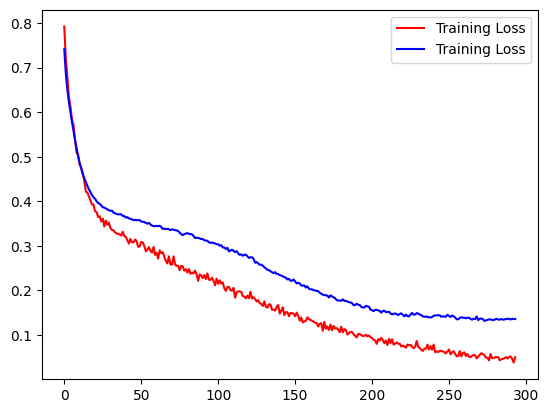

In [ ]:
plt.plot(trained_model2.history["loss"],color="red",label="Training Loss")
plt.plot(trained_model2.history["val_loss"],color="blue",label="Training Loss")
plt.legend()

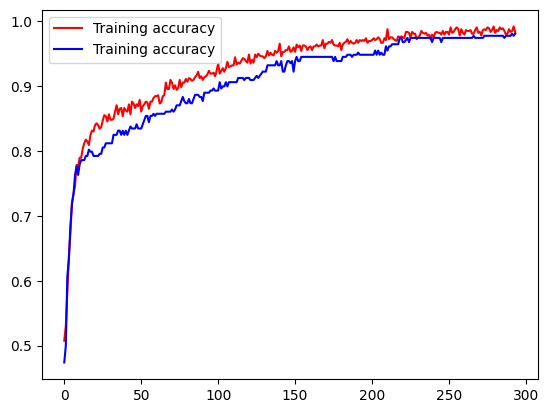

In [ ]:
plt.plot(trained_model2.history["accuracy"],color="red",label="Training accuracy")
plt.plot(trained_model2.history["val_accuracy"],color="blue",label="Training accuracy")
plt.legend()